# Gendist V1.0

In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
import os
import jax
import optax
import dojax
import pickle
import jax.numpy as jnp
import flax.linen as nn
import numpy as np
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from augly import image
from sklearn.decomposition import PCA
from datetime import datetime

from multiprocessing import Pool
from loguru import logger

In [22]:
from tqdm.notebook import tqdm

In [96]:
import gendis

In [88]:
from gendist.models import MLPDataV1
from gendist.processing import BlurRad, flat_and_concat_params
from gendist.training import TrainingConfig, make_cross_entropy_loss_func

In [46]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [4]:
mnist_train = torchvision.datasets.MNIST(root=".", train=True, download=True)
mnist_test = torchvision.datasets.MNIST(root=".", train=False, download=True)

In [5]:
X_train = np.array(mnist_train.data)
y_train = np.array(mnist_train.targets)
y_train_ohe = jax.nn.one_hot(y_train, n_classes)

(60000, 784)
CPU times: user 0 ns, sys: 5.54 s, total: 5.54 s
Wall time: 5.35 s


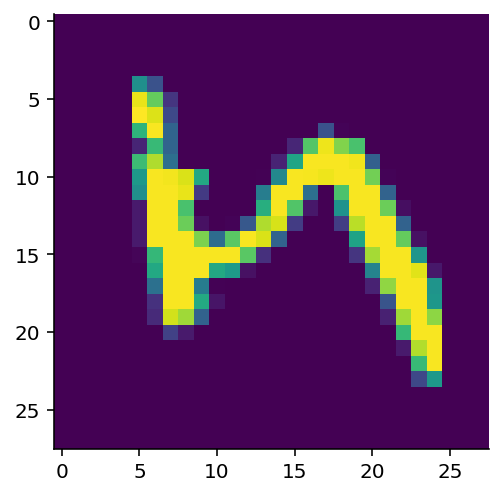

In [122]:
%%time
def processor(X, deg): return image.aug_np_wrapper(X, image.rotate, degrees=deg)
proc_class = gendist.processing.Factory(processor)
res = proc_class(X_train, deg=90)
print(res.shape)
plt.imshow(res[0].reshape(28, 28));

(60000, 784)
CPU times: user 0 ns, sys: 5.65 s, total: 5.65 s
Wall time: 5.35 s


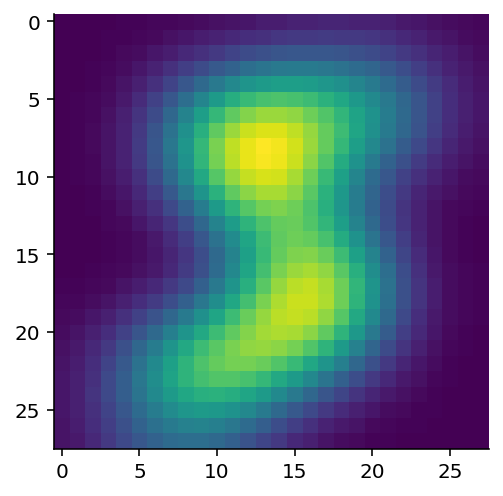

In [123]:
%%time

def processor(X, radius): return image.aug_np_wrapper(X, image.blur, radius=radius)
proc_class = gendist.processing.Factory(processor)
res = proc_class(X_train, radius=3.0)
print(res.shape)
plt.imshow(res[0].reshape(28, 28));

In [124]:
key = jax.random.PRNGKey(314)

n_classes = 10
batch_size = 2000
n_epochs = 150
alpha = 0.001
tx = optax.adam(learning_rate=alpha)

In [ ]:
def processor(X, radius): return image.aug_np_wrapper(X, image.blur, radius=radius)
proc_class = gendist.processing.Factory(processor)

model = MLPDataV1(n_classes)
train_config = TrainingConfig(model, proc_class, make_cross_entropy_loss_func, tx)

radii = np.linspace(0.001, 3.00, 100)
configs_params = []
configs_accuracy = []
for radius in tqdm(radii):
    config = {"radius": radius}
    params, train_acc = train_config.train_model_config(key, X_train, y_train_ohe,
                                                        config, n_epochs, batch_size)
    configs_params.append(params)
    configs_accuracy.append(train_acc)

  0%|          | 0/100 [00:00<?, ?it/s]

https://symbolize.stripped_domain/r/?trace=56210f408e20,7f45c76f53bf,56210f648f5f&map= 
*** SIGTERM received by PID 831347 (TID 831347) on cpu 43 from PID 788366; stack trace: ***
PC: @     0x56210f408e20  (unknown)  lookdict_unicode
    @     0x7f45b6fa37fa        992  (unknown)
    @     0x7f45c76f53c0  480212736  (unknown)
    @     0x56210f648f60  (unknown)  (unknown)
https://symbolize.stripped_domain/r/?trace=56210f408e20,7f45b6fa37f9,7f45c76f53bf,56210f648f5f&map=7a511a57244151c993b16b37978e7ed7:7f45a85cb000-7f45b730dd50 
E0307 08:44:10.801700  831347 coredump_hook.cc:320] RAW: Remote crash gathering disabled for SIGTERM.
E0307 08:44:10.828477  831347 process_state.cc:770] RAW: Raising signal 15 with default behavior


https://symbolize.stripped_domain/r/?trace=56210f48f58f,7f45c76f53bf,7f45c487ef0f,56210f64eb5f&map= 
*** SIGTERM received by PID 832054 (TID 832054) on cpu 80 from PID 788366; stack trace: ***
PC: @     0x56210f48f58f  (unknown)  _PyEval_EvalFrameDefault
    @     0x7f45b6fa37fa        992  (unknown)
    @     0x7f45c76f53c0  (unknown)  (unknown)
    @     0x7f45c487ef10  (unknown)  (unknown)
    @     0x56210f64eb60  (unknown)  (unknown)
https://symbolize.stripped_domain/r/?trace=56210f48f58f,7f45b6fa37f9,7f45c76f53bf,7f45c487ef0f,56210f64eb5f&map=7a511a57244151c993b16b37978e7ed7:7f45a85cb000-7f45b730dd50 
E0307 08:46:52.083591  832054 coredump_hook.cc:320] RAW: Remote crash gathering disabled for SIGTERM.
E0307 08:46:52.137123  832054 process_state.cc:770] RAW: Raising signal 15 with default behavior


https://symbolize.stripped_domain/r/?trace=56210f49424b,7f45c76f53bf,7f43454326ff,1fd0d053c8ebf,56211218240f&map= 
*** SIGTERM received by PID 832410 (TID 832410) on cpu 39 from PID 788366; stack trace: ***
PC: @     0x56210f49424b  (unknown)  _PyEval_EvalFrameDefault
    @     0x7f45b6fa37fa        992  (unknown)
    @     0x7f45c76f53c0  (unknown)  (unknown)
    @     0x7f4345432700  (unknown)  (unknown)
    @    0x1fd0d053c8ec0  (unknown)  (unknown)
    @     0x562112182410  (unknown)  (unknown)
https://symbolize.stripped_domain/r/?trace=56210f49424b,7f45b6fa37f9,7f45c76f53bf,7f43454326ff,1fd0d053c8ebf,56211218240f&map=7a511a57244151c993b16b37978e7ed7:7f45a85cb000-7f45b730dd50 
E0307 08:48:24.953403  832410 coredump_hook.cc:320] RAW: Remote crash gathering disabled for SIGTERM.
E0307 08:48:25.008670  832410 process_state.cc:770] RAW: Raising signal 15 with default behavior


https://symbolize.stripped_domain/r/?trace=56210f3faac2,7f45c76f53bf,56210f65111f&map= 
*** SIGTERM received by PID 834749 (TID 834749) on cpu 11 from PID 788366; stack trace: ***
PC: @     0x56210f3faac2  (unknown)  PyObject_GetAttr
    @     0x7f45b6fa37fa        992  (unknown)
    @     0x7f45c76f53c0  482140112  (unknown)
    @     0x56210f651120  (unknown)  (unknown)
https://symbolize.stripped_domain/r/?trace=56210f3faac2,7f45b6fa37f9,7f45c76f53bf,56210f65111f&map=7a511a57244151c993b16b37978e7ed7:7f45a85cb000-7f45b730dd50 
E0307 08:57:20.442769  834749 coredump_hook.cc:320] RAW: Remote crash gathering disabled for SIGTERM.
E0307 08:57:20.477679  834749 process_state.cc:770] RAW: Raising signal 15 with default behavior


In [83]:
date_str = datetime.now().strftime("%y%m%d")
filename = f"mnist-shift-params-{date_str}.pkl"
output_elements = {
    "configs": radii,
    "params": configs_params,
    "metric": configs_accuracy
}

with open(filename, "wb") as f:
    pickle.dump(output_elements, f)

In [85]:
configs_params_flat, fn_recontruct_params = dojax.flat_and_concat_params(configs_params)

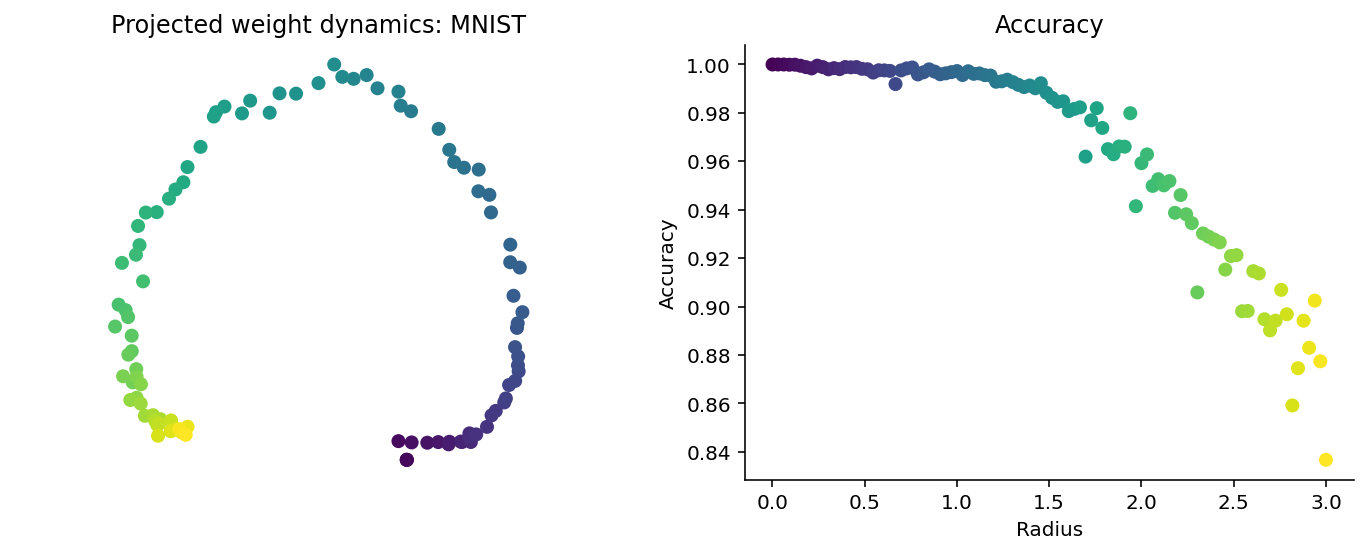

In [87]:
pca = PCA(n_components=2)
params_proj = pca.fit_transform(configs_params_flat)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("Projected weight dynamics: MNIST")
ax[0].scatter(*params_proj.T, c=radii)
# ax[0].cb(label="radius")
ax[0].tick_params(axis="both", labelleft=False, labelbottom=False)
ax[0].axis("equal")
ax[0].axis("off")


ax[1].set_title("Accuracy")
ax[1].scatter(radii, configs_accuracy, c=radii)
ax[1].set_xlabel("Radius")
ax[1].set_ylabel("Accuracy");